In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install pmdarima
!pip install --use-deprecated=legacy-resolver pycaret[full]

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=69b993745d47f3e1ba3cf5d641d4fa637cbeb747feb853df708c245b54207ac0
  Stored in directory: /root/.cache/pip/wheels/4

In [2]:
# display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams["lines.linewidth"] = 5.0

# 1. ARIMA

In [5]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
visadf = yf.download("V", start="2017-01-01", progress=False)
mastercarddf = yf.download("MA", start="2017-01-01", progress=False)
fiservdf = yf.download("FISV", start="2017-01-01", progress=False)
paypaldf = yf.download("PYPL", start="2017-01-01", progress=False)

In [6]:
amexdf.head(3)
visadf.head(3)
mastercarddf.head(3)
fiservdf.head(3)
paypaldf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781250,5853900
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925194,4635800
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050980,3383000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,78.760002,79.910004,78.489998,79.500000,76.844185,13785200
2017-01-04,79.440002,80.260002,79.360001,80.150002,77.472488,8033100
2017-01-05,80.339996,81.529999,80.220001,81.089996,78.381088,7805100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,104.410004,105.940002,104.110001,105.389999,102.280418,4711300
2017-01-04,105.339996,106.750000,104.860001,106.389999,103.250900,3299000
2017-01-05,107.050003,108.150002,106.459999,106.989998,104.048378,3262200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,53.41,53.845001,53.244999,53.669998,53.669998,2142600
2017-01-04,53.66,54.365002,53.654999,54.325001,54.325001,1359000
2017-01-05,54.23,54.590000,54.005001,54.305000,54.305000,1662400


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,40.290001,40.980000,40.000000,40.250000,40.250000,8247400
2017-01-04,40.349998,41.029999,40.044998,41.000000,41.000000,6806400
2017-01-05,41.430000,41.720001,41.040001,41.060001,41.060001,6432000


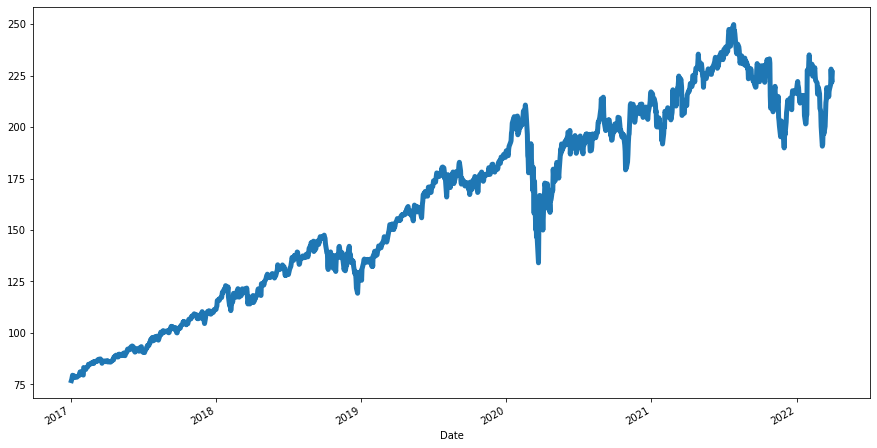

In [7]:
visadf["Adj Close"].plot()

In [8]:
visadf.isnull().sum().sum()

0

In [9]:
visadf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1.322000e+03
mean,165.328502,166.848865,163.752829,165.316815,163.051820,8.498805e+06
std,46.206073,46.740389,45.660932,46.160211,46.868848,3.680479e+06
min,78.760002,79.910004,78.489998,79.500000,76.844185,2.420900e+06
25%,125.297499,126.924997,124.314999,125.792501,122.504347,6.103200e+06
50%,172.985001,175.129997,170.684998,173.195000,170.550591,7.581950e+06
75%,205.987499,208.139996,204.110004,206.147495,204.561661,9.756600e+06
max,250.050003,252.669998,248.220001,250.929993,249.741714,3.837960e+07


In [10]:
# # ril_monthly_df = rildf.resample("1m").mean().sort_values(by="Date", ascending=False)
# amex_monthly_df = amexdf.resample("1m").mean()
# amex_monthly_df.head(3)

In [12]:
# amex_monthly_df['Adj Close'].plot()

In [13]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12)
# figure = decomposition.plot()
# plt.show()

In [14]:
visadf["Return"] = np.log(visadf["Adj Close"]) - np.log(visadf["Adj Close"].shift(1))
visadf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-03,78.760002,79.910004,78.489998,79.500000,76.844185,13785200,NaN
2017-01-04,79.440002,80.260002,79.360001,80.150002,77.472488,8033100,0.008143
2017-01-05,80.339996,81.529999,80.220001,81.089996,78.381088,7805100,0.011660


In [15]:
visadf.dropna(inplace=True)

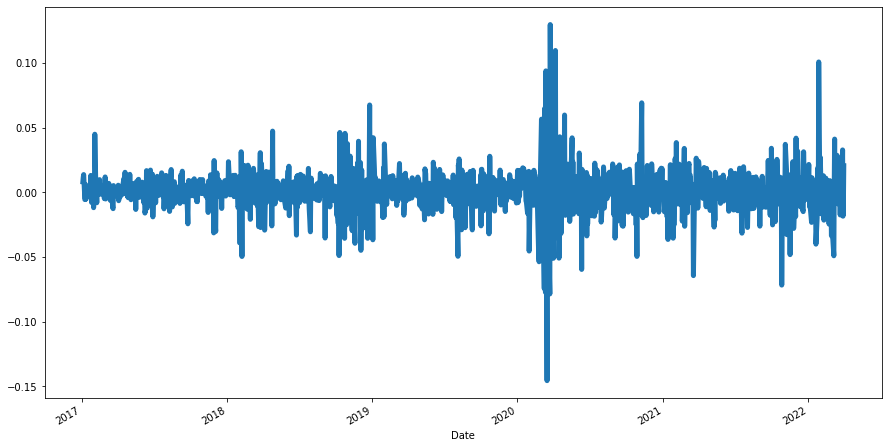

In [16]:
visadf.Return.plot()

In [17]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12, model="multiplicative")
# figure = decomposition.plot()
# plt.show()

In [18]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(visadf["Return"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(visadf["Return"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(visadf["Return"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(visadf["Return"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (6845.298917220825, 0.0)
AndersonResult(statistic=30.5952164997575, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.4743271014958862, pvalue=1.988256593804693e-273)
ShapiroWilkTest 0.8809268474578857 1.173662366386418e-30


In [21]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(visadf["Adj Close"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(visadf["Adj Close"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(visadf["Adj Close"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(visadf["Adj Close"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (87.09732342709204, 0.0)
AndersonResult(statistic=19.78182468687146, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroWilkTest 0.9494618773460388 6.757138257543382e-21


In [22]:
# from numpy.random import randn
# data = 5 * randn(100) + 5

In [23]:
# # Tests of Normality
# import scipy.stats as ss

# # Jarque–Bera Test
# statistic = ss.jarque_bera(data)
# print("JarqueBeraTest", statistic)

# # Anderson-Darling Normality Test
# statistic = ss.anderson(data)
# print(statistic)

# # Kolmogorov-Smirnov Test
# statistic = ss.kstest(data, 'norm')
# print(statistic)

# # Shapiro-Wilk Test
# statistic, pvalue = ss.shapiro(data)
# print(f"ShapiroWilkTest ({statistic}, {pvalue})")

In [24]:
# Tests of Stationarity
from statsmodels.tsa import stattools
from statsmodels.stats import diagnostic

# Augmented Dickey Fuller Test
statistic = stattools.adfuller(visadf["Return"])
print("AugmentedDickeyFullerTest", statistic)

# Ljung-Box Test (test for auto-correlation)
statistic = diagnostic.acorr_ljungbox(visadf["Return"], lags=[1])
print("LjungboxTest", statistic)

AugmentedDickeyFullerTest (-9.465932577481972, 4.230258200767419e-16, 15, 1305, {'1%': -3.4353708501743654, '5%': -2.8637572934525286, '10%': -2.56795049999266}, -6952.848021401111)
LjungboxTest      lb_stat     lb_pvalue
1  32.940866  9.500504e-09


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


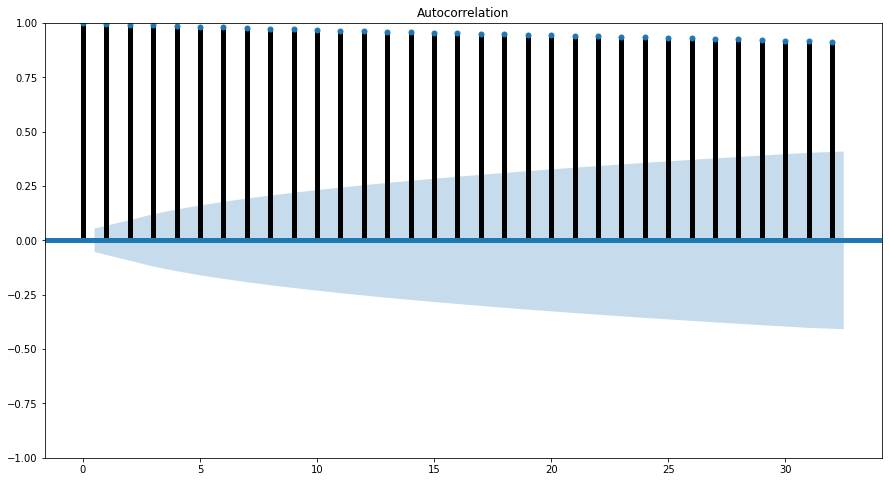

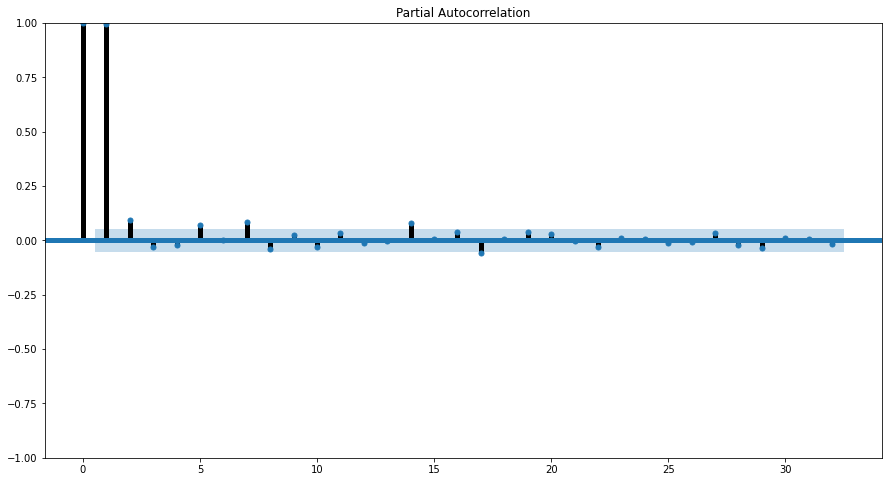

In [25]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(visadf["Adj Close"])
pacf = sgt.plot_pacf(visadf["Adj Close"])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


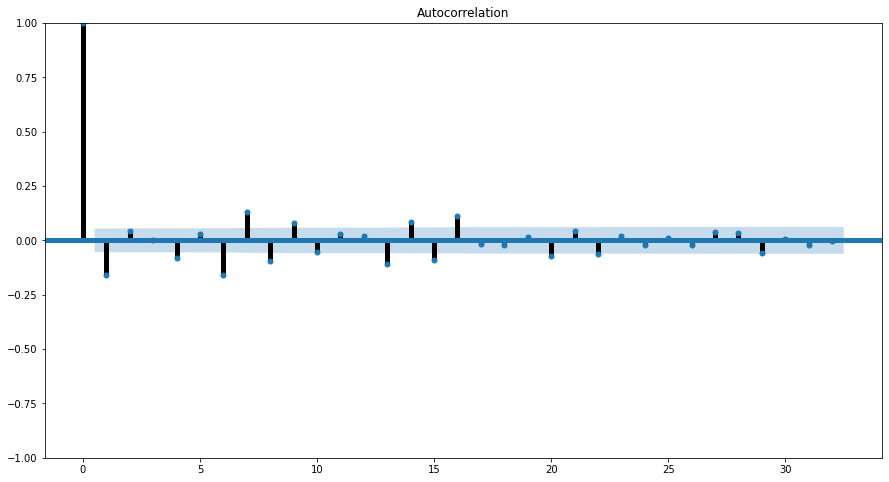

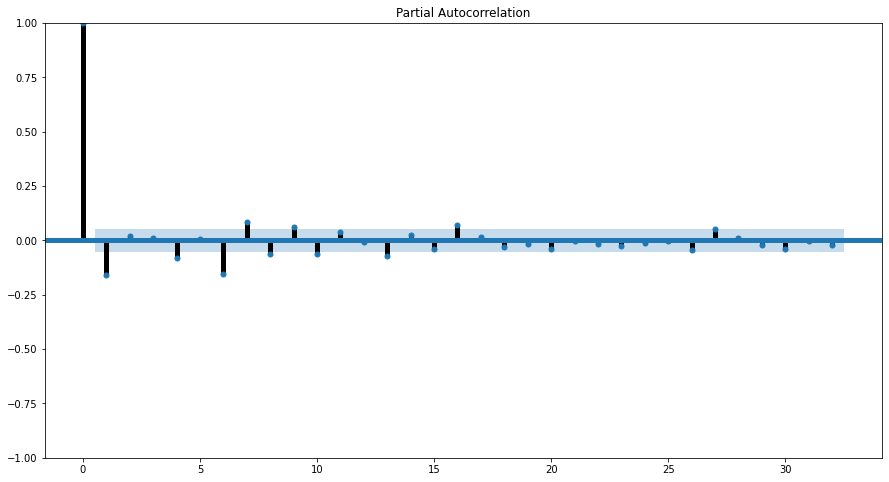

In [26]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(visadf["Return"])
pacf = sgt.plot_pacf(visadf["Return"])

In [27]:
# normal transformation
box_data, box_lambda = ss.boxcox(visadf["Adj Close"])
yeo_data, yeo_lambda = ss.yeojohnson(visadf["Return"])

print(f"old adjusted close skew: {ss.skew(visadf['Adj Close'])} old kurtosis: {ss.kurtosis(visadf['Adj Close'])}")
print(f"old return skew: {ss.skew(visadf['Return'])} old kurtosis: {ss.kurtosis(visadf['Return'])}")
print(f"box skew: {ss.skew(box_data)} old kurtosis: {ss.kurtosis(box_data)}")
print(f"yeo skew: {ss.skew(yeo_data)} old kurtosis: {ss.kurtosis(yeo_data)}")

old adjusted close skew: -0.14106285794226578 old kurtosis: -1.2258849862963517
old return skew: -0.12332832506774573 old kurtosis: 11.149211825160709
box skew: -0.13517047130994841 old kurtosis: -1.2280821782925444
yeo skew: 0.03425953203308295 old kurtosis: 11.14903797783984


In [28]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(box_data)
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(box_data)
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(box_data, 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(box_data)
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (87.03573965687966, 0.0)
AndersonResult(statistic=19.731283123634512, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroWilkTest 0.949562668800354 7.08255143363917e-21


In [29]:
# import pmdarima as pmd
# model = pmd.auto_arima(rildf["Return"], max_p=10, max_q=10, max_d=3, max_order=20)
# model.summary()
# import pmdarima as pmd
# yeo_model = pmd.auto_arima(yeo_data, max_p=10, max_q=10, max_d=3, max_order=20)
# yeo_model.summary()
# import pmdarima as pmd
# box_model = pmd.auto_arima(box_data, max_p=10, max_q=10, max_d=3, max_order=20)
# box_model.summary()
# model.predict(n_periods=10)
# infy_df.reset_index(inplace=True)

In [30]:
# cutoff_date = '2021-12-31'
# xtrain, xtest = amexdf.loc[amexdf.index <= cutoff_date], amexdf.loc[amexdf.index > cutoff_date]

In [31]:
import pmdarima as pmd

maxlen = len(visadf)
forecast1 = []

for ii in range(30):
  train_model = pmd.auto_arima(visadf[ii:ii+maxlen-30]["Adj Close"], max_p=5, max_q=5, max_d=2, max_order=11)
  train_model.fit(visadf[ii:ii+maxlen-30]["Adj Close"])
  forecast1.append(train_model.predict(n_periods=1).item())


ARIMA(order=(5, 1, 4), scoring_args={}, suppress_warnings=True)

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True)

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [32]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(visadf[-30:]["Adj Close"], forecast1, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=4.50


In [33]:
# import pmdarima as pmd
# train_model = pmd.auto_arima(amexdf[:-30]["Adj Close"], max_p=10, max_q=10, max_d=3, max_order=20)
# train_model.fit(amexdf[:-30]["Adj Close"])
# train_model.summary()

In [34]:
# forecast1 = train_model.predict(n_periods=30)

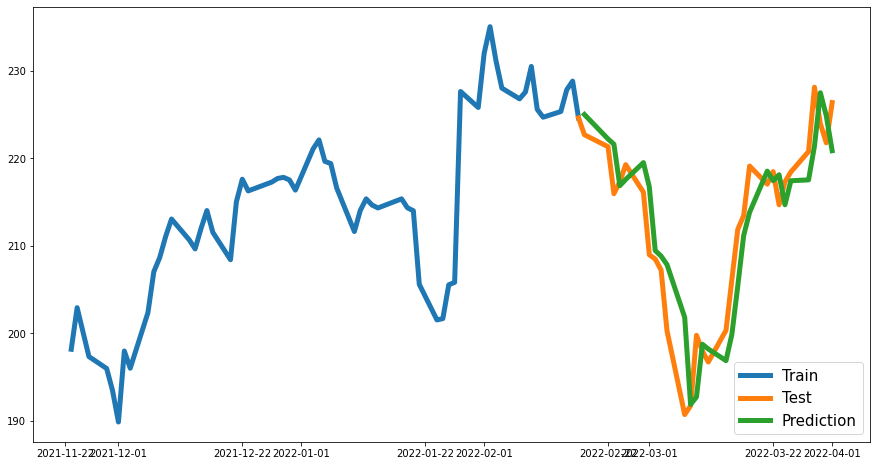

In [35]:
forecast1 = pd.DataFrame(forecast1, index = visadf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(visadf[-90:-30]["Adj Close"], label="Train")
plt.plot(visadf[-31:]["Adj Close"], label="Test")
plt.plot(forecast1, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [ ]:
# xresiduals = xtest["Return"].values - forecast["Prediction"].values

In [ ]:
# _ = sgt.plot_acf(xresiduals, lags=15)
# _ = sgt.plot_pacf(xresiduals, lags=15)


In [ ]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit1 = ExponentialSmoothing(xtrain["Adj Close"], seasonal_periods=52, trend='mul', seasonal='mul')
# fit1 = fit1.fit()
# prediction = fit1.forecast(len(xtest)).copy()
# xresiduals = xtest["Adj Close"].values - prediction

In [ ]:
# # fit1.params_formatted
# xtest.shape[0]/xtrain.shape[0]

In [ ]:
# sgt.plot_acf(xresiduals, lags=15);
# sgt.plot_pacf(xresiduals, lags=15);

In [ ]:
# prediction = pd.DataFrame(prediction.values, index = xtest.index, columns=['Prediction'])

In [ ]:
# plt.plot(xtrain["Adj Close"], label="Train")
# plt.plot(xtest["Adj Close"], label="Test")
# plt.plot(prediction, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

In [ ]:
# from sklearn.metrics import mean_squared_error

# rmse = mean_squared_error(xtest["Return"], forecast["Prediction"], squared=False)
# print(f"RMSE={rmse*100:.4f}%")

# 2. VAR

In [36]:
visadf = yf.download("V", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [37]:
visadf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,78.760002,79.910004,78.489998,79.500000,76.844200,13785200
2017-01-04,79.440002,80.260002,79.360001,80.150002,77.472496,8033100
2017-01-05,80.339996,81.529999,80.220001,81.089996,78.381081,7805100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.94960,0.95550,0.9487,0.94994,0.94994,0
2017-01-03,0.95610,0.96640,0.9531,0.95602,0.95602,0
2017-01-04,0.95984,0.96234,0.9543,0.95970,0.95970,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2.511,2.518,2.448,2.450,2.450,0
2017-01-04,2.456,2.474,2.434,2.452,2.452,0
2017-01-05,2.439,2.443,2.346,2.368,2.368,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581011,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679937,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650730,3300


In [38]:
masterdf = pd.concat([visadf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["visa price", "amazon price", "euro price", "treasury price", "inflation price"]
masterdf

,visa price,amazon price,euro price,treasury price,inflation price
Date,,,,,
2019-11-07,175.675171,1788.199951,0.903310,1.926,23.581011
2019-11-08,176.206879,1785.880005,0.907466,1.933,23.679937
2019-11-11,176.768082,1771.650024,0.907240,1.943,23.650730
2019-11-12,176.964966,1778.000000,0.906170,1.909,23.698780
2019-11-13,176.640060,1753.109985,0.908070,1.870,23.698780
...,...,...,...,...,...
2022-03-28,220.770004,3379.810059,0.910590,2.477,34.250000
2022-03-29,228.119995,3386.300049,0.909600,2.400,34.779999
2022-03-30,223.949997,3326.020020,0.901590,2.358,34.549999


In [39]:
from statsmodels.tsa.vector_ar.var_model import VAR

maxlen = len(masterdf)
forecast2 = []

for ii in range(30):
  df = masterdf[ii:ii+maxlen-30]
  train_model = VAR(df)
  result = train_model.select_order(maxlags=10)
  result = train_model.fit(maxlags=result.aic)
  lagged_Values = df.values[-result.k_ar:]
  forecast2.append(result.forecast(y=lagged_Values, steps=1)[0][0])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr

In [40]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(masterdf[-30:]["visa price"], forecast2, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=4.45


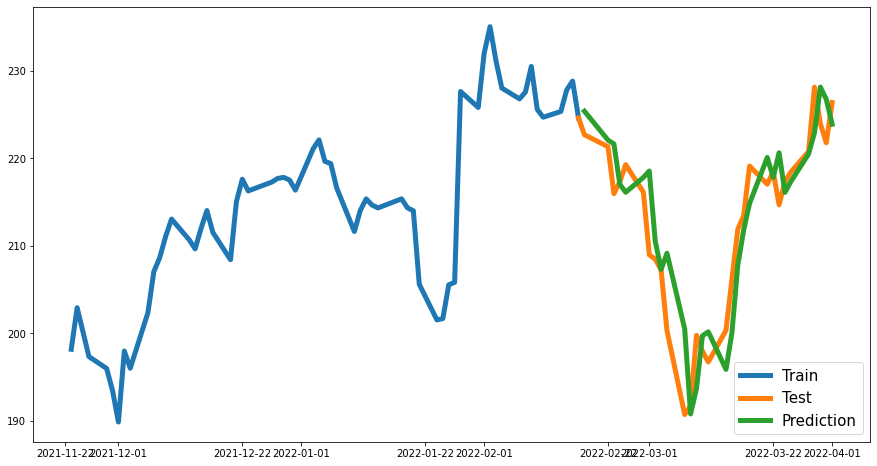

In [41]:
forecast2 = pd.DataFrame(forecast2, index = visadf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(visadf[-90:-30]["Adj Close"], label="Train")
plt.plot(visadf[-31:]["Adj Close"], label="Test")
plt.plot(forecast2, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [ ]:
# from statsmodels.tsa.vector_ar.var_model import VAR

# # masterdf = np.log(masterdf).diff(1).dropna()
# # masterdf
# model = VAR(masterdf[:-30])
# result = model.select_order(maxlags=10)
# result.summary()
# result = model.fit(maxlags=result.aic)
# # result.summary()
# lagged_Values = masterdf.values[-result.k_ar:]

# forecast2 = result.forecast(y=lagged_Values, steps=30) 
# forecast2 = pd.DataFrame(forecast2[:,0], index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])

# plt.plot(amexdf[-90:-29]["Adj Close"], label="Train")
# plt.plot(amexdf[-30:]["Adj Close"], label="Test")
# plt.plot(forecast2, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

# 3. Deep Learning - LSTM

In [42]:
visadf = yf.download("V", start="2017-01-01", progress=False)
visadf["Return"] = np.log(visadf["Adj Close"]) - np.log(visadf["Adj Close"].shift(1))
visadf.dropna(inplace=True)
visadf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-04,79.440002,80.260002,79.360001,80.150002,77.472481,8033100,0.008143
2017-01-05,80.339996,81.529999,80.220001,81.089996,78.381073,7805100,0.011660
2017-01-06,81.300003,82.489998,80.940002,82.209999,79.463661,8898300,0.013717


In [43]:
import torch

def sliding_window(ts, window_size=10):
  X = []
  Y = []
  ts = ts.tolist()

  for ii in range(window_size+1, len(ts)+1):
    X.append(ts[ii-(window_size+1):ii-1])
    Y.append(ts[ii-1])

  return torch.Tensor(X), torch.Tensor(Y)

In [44]:
xtrain, ytrain = sliding_window(visadf["Adj Close"])

In [45]:
ytrain

tensor([ 78.9997,  79.1060,  79.4057,  ..., 223.9500, 221.7700, 226.3600])

In [46]:
import torch
import torch.nn as nn

class GRU(nn.Module):
  def __init__(self, hidden_size, in_size=1, out_size=1):
    super(GRU, self).__init__()
    self.hidden_size = hidden_size
    self.gru = nn.GRU(
        input_size = in_size,
        hidden_size = hidden_size,
        batch_first = True
    )
    self.fc = nn.Linear(hidden_size, out_size)

  def forward(self, x, h):
    # h = torch.zeros(1, x.size(0), self.hidden_size)
    out, _ = self.gru(x, h)
    last_hidden_states = out[:, -1]
    out = self.fc(last_hidden_states)
    return out, last_hidden_states 

  def init_state(self, batch_size):
    hidden = next(self.parameters()).data.new(batch_size, self.hidden_size).zero_()
    return hidden


In [47]:
hidden_size = 1024
learning_rate = 0.95
epochs = 1000

In [ ]:
# model = GRU(hidden_size = hidden_size)
# model.cuda()
# model.train()
# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
# losses = []
# hidden = model.init_state(xtrain.size(0)-1)
# hidden.cuda()
# epochs = 1000
# input = xtrain[:-1,:].unsqueeze(2)
# input = input.cuda()
# target = ytrain[:-1]
# target = target.cuda()

# for ii in range(1, epochs+1):
#   hidden = hidden.data.unsqueeze(0)
#   pred, hidden = model(input, hidden)
#   # print(f"prediction: {pred.squeeze()}", f"actual: {ytrain[:-1]}")
#   loss = criterion(target, pred.squeeze())
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()
#   losses.append(loss.item())
#   # print(f"losses: {losses}")

#   if (ii%50 == 0):
#     print(f"epoch: {ii}... loss: {losses[-1]}")
# forecast3 = []

# model.eval()
# with torch.no_grad():
#   pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
#   forecast3.append(pred)

# forecast3

In [ ]:
# model.eval()
# xtrain[-1, :].shape
# with torch.no_grad():
#   pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
# xtrain[-1:, :].unsqueeze(2).shape
# hidden[-1:, :].unsqueeze(0).shape
# pred

In [48]:
import copy

maxlen = len(visadf)
trainlist = []
forecast3 = []

for ii in range(30):
  model = GRU(hidden_size = hidden_size)
  model.cuda()
  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
  xtrain, ytrain = sliding_window(visadf[ii:ii+maxlen-30+1]["Adj Close"])
  xtrain, ytrain = xtrain.cuda(), ytrain.cuda()

  losses = []
  hidden = model.init_state(xtrain.size(0)-1)

  model.train()

  for ii in range(1, epochs+1):
    hidden = hidden.data.unsqueeze(0)
    pred, hidden = model(xtrain[:-1, :].unsqueeze(2), hidden)
    loss = criterion(ytrain[:-1], pred.squeeze())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (ii%50 == 0):
        print(f"epoch: {ii}... loss: {losses[-1]}")

  model.eval()
  with torch.no_grad():
    pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
    trainlist.append(copy.deepcopy(xtrain[-1:, :]))
    forecast3.append(pred)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1277.8807373046875
epoch: 100... loss: 80.97811889648438
epoch: 150... loss: 45.15084457397461
epoch: 200... loss: 27.521827697753906
epoch: 250... loss: 20.431255340576172
epoch: 300... loss: 17.910015106201172
epoch: 350... loss: 16.96785545349121
epoch: 400... loss: 16.475370407104492
epoch: 450... loss: 16.094188690185547
epoch: 500... loss: 15.742284774780273
epoch: 550... loss: 15.4035005569458
epoch: 600... loss: 15.075163841247559
epoch: 650... loss: 14.75674057006836
epoch: 700... loss: 14.447954177856445
epoch: 750... loss: 14.148565292358398
epoch: 800... loss: 13.85844898223877
epoch: 850... loss: 13.577567100524902
epoch: 900... loss: 13.305992126464844
epoch: 950... loss: 13.043904304504395
epoch: 1000... loss: 12.791487693786621


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 179.7493133544922
epoch: 100... loss: 56.874759674072266
epoch: 150... loss: 24.733579635620117
epoch: 200... loss: 15.079679489135742
epoch: 250... loss: 12.405344009399414
epoch: 300... loss: 11.691412925720215
epoch: 350... loss: 11.385428428649902
epoch: 400... loss: 11.147586822509766
epoch: 450... loss: 10.925436973571777
epoch: 500... loss: 10.714974403381348
epoch: 550... loss: 10.517614364624023
epoch: 600... loss: 10.334623336791992
epoch: 650... loss: 10.166716575622559
epoch: 700... loss: 10.014084815979004
epoch: 750... loss: 9.8765230178833
epoch: 800... loss: 9.753458976745605
epoch: 850... loss: 9.64410400390625
epoch: 900... loss: 9.547478675842285
epoch: 950... loss: 9.462498664855957
epoch: 1000... loss: 9.388030052185059


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 147.32847595214844
epoch: 100... loss: 77.42958068847656
epoch: 150... loss: 37.671146392822266
epoch: 200... loss: 22.73584747314453
epoch: 250... loss: 17.81142234802246
epoch: 300... loss: 16.114635467529297
epoch: 350... loss: 15.252360343933105
epoch: 400... loss: 14.611427307128906
epoch: 450... loss: 14.069986343383789
epoch: 500... loss: 13.603626251220703
epoch: 550... loss: 13.201284408569336
epoch: 600... loss: 12.852922439575195
epoch: 650... loss: 12.54904842376709
epoch: 700... loss: 12.281158447265625
epoch: 750... loss: 12.042082786560059
epoch: 800... loss: 11.826025009155273
epoch: 850... loss: 11.628473281860352
epoch: 900... loss: 11.44600772857666
epoch: 950... loss: 11.276124954223633
epoch: 1000... loss: 11.116997718811035


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 845.023193359375
epoch: 100... loss: 85.68218994140625
epoch: 150... loss: 46.48550033569336
epoch: 200... loss: 29.366043090820312
epoch: 250... loss: 21.971832275390625
epoch: 300... loss: 19.146757125854492
epoch: 350... loss: 18.050552368164062
epoch: 400... loss: 17.49136734008789
epoch: 450... loss: 17.068883895874023
epoch: 500... loss: 16.674118041992188
epoch: 550... loss: 16.28427505493164
epoch: 600... loss: 15.897353172302246
epoch: 650... loss: 15.515284538269043
epoch: 700... loss: 15.140388488769531
epoch: 750... loss: 14.774742126464844
epoch: 800... loss: 14.420136451721191
epoch: 850... loss: 14.078054428100586
epoch: 900... loss: 13.749670028686523
epoch: 950... loss: 13.435927391052246
epoch: 1000... loss: 13.137508392333984


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1004.9486694335938
epoch: 100... loss: 93.19520568847656
epoch: 150... loss: 49.217567443847656
epoch: 200... loss: 29.75926399230957
epoch: 250... loss: 21.599632263183594
epoch: 300... loss: 18.581220626831055
epoch: 350... loss: 17.4409236907959
epoch: 400... loss: 16.864158630371094
epoch: 450... loss: 16.42906951904297
epoch: 500... loss: 16.02681541442871
epoch: 550... loss: 15.636346817016602
epoch: 600... loss: 15.25635814666748
epoch: 650... loss: 14.888862609863281
epoch: 700... loss: 14.535900115966797
epoch: 750... loss: 14.199132919311523
epoch: 800... loss: 13.879698753356934
epoch: 850... loss: 13.578347206115723
epoch: 900... loss: 13.295449256896973
epoch: 950... loss: 13.03101921081543
epoch: 1000... loss: 12.784812927246094


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 149.80990600585938
epoch: 100... loss: 82.67391204833984
epoch: 150... loss: 43.91465377807617
epoch: 200... loss: 26.626859664916992
epoch: 250... loss: 19.76116371154785
epoch: 300... loss: 17.349435806274414
epoch: 350... loss: 16.444520950317383
epoch: 400... loss: 15.952914237976074
epoch: 450... loss: 15.554901123046875
epoch: 500... loss: 15.176897048950195
epoch: 550... loss: 14.807306289672852
epoch: 600... loss: 14.446784973144531
epoch: 650... loss: 14.097600936889648
epoch: 700... loss: 13.761810302734375
epoch: 750... loss: 13.441015243530273
epoch: 800... loss: 13.136398315429688
epoch: 850... loss: 12.848738670349121
epoch: 900... loss: 12.578469276428223
epoch: 950... loss: 12.325709342956543
epoch: 1000... loss: 12.090315818786621


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1103.975830078125
epoch: 100... loss: 69.45536804199219
epoch: 150... loss: 34.229854583740234
epoch: 200... loss: 22.427587509155273
epoch: 250... loss: 18.8789119720459
epoch: 300... loss: 17.71660041809082
epoch: 350... loss: 17.06496810913086
epoch: 400... loss: 16.49827766418457
epoch: 450... loss: 15.950039863586426
epoch: 500... loss: 15.417258262634277
epoch: 550... loss: 14.904202461242676
epoch: 600... loss: 14.414693832397461
epoch: 650... loss: 13.95147705078125
epoch: 700... loss: 13.51632022857666
epoch: 750... loss: 13.11014175415039
epoch: 800... loss: 12.733132362365723
epoch: 850... loss: 12.384932518005371
epoch: 900... loss: 12.064711570739746
epoch: 950... loss: 11.771302223205566
epoch: 1000... loss: 11.503279685974121


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 217.31903076171875
epoch: 100... loss: 71.83157348632812
epoch: 150... loss: 35.428775787353516
epoch: 200... loss: 21.996644973754883
epoch: 250... loss: 17.309886932373047
epoch: 300... loss: 15.792567253112793
epoch: 350... loss: 15.16140365600586
epoch: 400... loss: 14.726297378540039
epoch: 450... loss: 14.329010963439941
epoch: 500... loss: 13.943979263305664
epoch: 550... loss: 13.57076644897461
epoch: 600... loss: 13.212080955505371
epoch: 650... loss: 12.870401382446289
epoch: 700... loss: 12.54755973815918
epoch: 750... loss: 12.244812965393066
epoch: 800... loss: 11.962865829467773
epoch: 850... loss: 11.701961517333984
epoch: 900... loss: 11.461945533752441
epoch: 950... loss: 11.242326736450195
epoch: 1000... loss: 11.042362213134766


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1183.1539306640625
epoch: 100... loss: 56.91181182861328
epoch: 150... loss: 27.481794357299805
epoch: 200... loss: 17.656143188476562
epoch: 250... loss: 15.059612274169922
epoch: 300... loss: 14.292027473449707
epoch: 350... loss: 13.859028816223145
epoch: 400... loss: 13.47562026977539
epoch: 450... loss: 13.10679817199707
epoch: 500... loss: 12.7531156539917
epoch: 550... loss: 12.417824745178223
epoch: 600... loss: 12.103421211242676
epoch: 650... loss: 11.811482429504395
epoch: 700... loss: 11.5427827835083
epoch: 750... loss: 11.29743766784668
epoch: 800... loss: 11.075007438659668
epoch: 850... loss: 10.874603271484375
epoch: 900... loss: 10.695022583007812
epoch: 950... loss: 10.534808158874512
epoch: 1000... loss: 10.392364501953125


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 724.6878051757812
epoch: 100... loss: 79.2245101928711
epoch: 150... loss: 42.45254135131836
epoch: 200... loss: 28.095151901245117
epoch: 250... loss: 22.525070190429688
epoch: 300... loss: 20.523529052734375
epoch: 350... loss: 19.66023826599121
epoch: 400... loss: 19.087589263916016
epoch: 450... loss: 18.575763702392578
epoch: 500... loss: 18.07770347595215
epoch: 550... loss: 17.588502883911133
epoch: 600... loss: 17.110586166381836
epoch: 650... loss: 16.646825790405273
epoch: 700... loss: 16.199594497680664
epoch: 750... loss: 15.770674705505371
epoch: 800... loss: 15.361315727233887
epoch: 850... loss: 14.972312927246094
epoch: 900... loss: 14.604055404663086
epoch: 950... loss: 14.256610870361328
epoch: 1000... loss: 13.92977523803711


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 225.13209533691406
epoch: 100... loss: 70.6202163696289
epoch: 150... loss: 38.368831634521484
epoch: 200... loss: 23.63677406311035
epoch: 250... loss: 18.17027473449707
epoch: 300... loss: 16.330795288085938
epoch: 350... loss: 15.605724334716797
epoch: 400... loss: 15.156996726989746
epoch: 450... loss: 14.768308639526367
epoch: 500... loss: 14.397623062133789
epoch: 550... loss: 14.040704727172852
epoch: 600... loss: 13.699318885803223
epoch: 650... loss: 13.375422477722168
epoch: 700... loss: 13.0703706741333
epoch: 750... loss: 12.78493881225586
epoch: 800... loss: 12.519376754760742
epoch: 850... loss: 12.273504257202148
epoch: 900... loss: 12.046783447265625
epoch: 950... loss: 11.838385581970215
epoch: 1000... loss: 11.64729118347168


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 947.4892578125
epoch: 100... loss: 83.20381927490234
epoch: 150... loss: 44.038795471191406
epoch: 200... loss: 27.109874725341797
epoch: 250... loss: 19.907732009887695
epoch: 300... loss: 17.14154624938965
epoch: 350... loss: 16.011489868164062
epoch: 400... loss: 15.390959739685059
epoch: 450... loss: 14.9190034866333
epoch: 500... loss: 14.502050399780273
epoch: 550... loss: 14.120627403259277
epoch: 600... loss: 13.771206855773926
epoch: 650... loss: 13.452392578125
epoch: 700... loss: 13.162470817565918
epoch: 750... loss: 12.899181365966797
epoch: 800... loss: 12.659975051879883
epoch: 850... loss: 12.442180633544922
epoch: 900... loss: 12.243159294128418
epoch: 950... loss: 12.060455322265625
epoch: 1000... loss: 11.891803741455078


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 795.5504150390625
epoch: 100... loss: 84.94402313232422
epoch: 150... loss: 43.957237243652344
epoch: 200... loss: 27.65960121154785
epoch: 250... loss: 21.00282096862793
epoch: 300... loss: 18.287626266479492
epoch: 350... loss: 16.984649658203125
epoch: 400... loss: 16.191844940185547
epoch: 450... loss: 15.610437393188477
epoch: 500... loss: 15.132696151733398
epoch: 550... loss: 14.713894844055176
epoch: 600... loss: 14.334300994873047
epoch: 650... loss: 13.98533821105957
epoch: 700... loss: 13.66320514678955
epoch: 750... loss: 13.365900039672852
epoch: 800... loss: 13.091856002807617
epoch: 850... loss: 12.8395414352417
epoch: 900... loss: 12.607308387756348
epoch: 950... loss: 12.393436431884766
epoch: 1000... loss: 12.196206092834473


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 202.84552001953125
epoch: 100... loss: 50.32146072387695
epoch: 150... loss: 25.933040618896484
epoch: 200... loss: 17.249414443969727
epoch: 250... loss: 14.785073280334473
epoch: 300... loss: 14.043872833251953
epoch: 350... loss: 13.655810356140137
epoch: 400... loss: 13.32491683959961
epoch: 450... loss: 13.006977081298828
epoch: 500... loss: 12.699568748474121
epoch: 550... loss: 12.404692649841309
epoch: 600... loss: 12.124114990234375
epoch: 650... loss: 11.859039306640625
epoch: 700... loss: 11.610207557678223
epoch: 750... loss: 11.377958297729492
epoch: 800... loss: 11.162353515625
epoch: 850... loss: 10.963216781616211
epoch: 900... loss: 10.780181884765625
epoch: 950... loss: 10.612751960754395
epoch: 1000... loss: 10.460320472717285


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 161.6827850341797
epoch: 100... loss: 95.05830383300781
epoch: 150... loss: 55.64949035644531
epoch: 200... loss: 34.47465133666992
epoch: 250... loss: 24.896732330322266
epoch: 300... loss: 21.043956756591797
epoch: 350... loss: 19.487003326416016
epoch: 400... loss: 18.70004653930664
epoch: 450... loss: 18.13662338256836
epoch: 500... loss: 17.636613845825195
epoch: 550... loss: 17.162689208984375
epoch: 600... loss: 16.709400177001953
epoch: 650... loss: 16.277603149414062
epoch: 700... loss: 15.86864185333252
epoch: 750... loss: 15.483344078063965
epoch: 800... loss: 15.121903419494629
epoch: 850... loss: 14.784018516540527
epoch: 900... loss: 14.46894359588623
epoch: 950... loss: 14.175623893737793
epoch: 1000... loss: 13.902800559997559


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 129.49964904785156
epoch: 100... loss: 65.0460433959961
epoch: 150... loss: 31.67875099182129
epoch: 200... loss: 19.299686431884766
epoch: 250... loss: 15.606757164001465
epoch: 300... loss: 14.574318885803223
epoch: 350... loss: 14.151081085205078
epoch: 400... loss: 13.833738327026367
epoch: 450... loss: 13.532304763793945
epoch: 500... loss: 13.237117767333984
epoch: 550... loss: 12.949787139892578
epoch: 600... loss: 12.672652244567871
epoch: 650... loss: 12.407648086547852
epoch: 700... loss: 12.15621566772461
epoch: 750... loss: 11.91936206817627
epoch: 800... loss: 11.697713851928711
epoch: 850... loss: 11.49155330657959
epoch: 900... loss: 11.300863265991211
epoch: 950... loss: 11.12539291381836
epoch: 1000... loss: 10.964675903320312


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 642.8789672851562
epoch: 100... loss: 71.93061065673828
epoch: 150... loss: 37.42615509033203
epoch: 200... loss: 23.476335525512695
epoch: 250... loss: 18.724388122558594
epoch: 300... loss: 17.188875198364258
epoch: 350... loss: 16.51506996154785
epoch: 400... loss: 16.02387237548828
epoch: 450... loss: 15.568477630615234
epoch: 500... loss: 15.127561569213867
epoch: 550... loss: 14.70193862915039
epoch: 600... loss: 14.294679641723633
epoch: 650... loss: 13.908346176147461
epoch: 700... loss: 13.544694900512695
epoch: 750... loss: 13.204765319824219
epoch: 800... loss: 12.889008522033691
epoch: 850... loss: 12.597338676452637
epoch: 900... loss: 12.329224586486816
epoch: 950... loss: 12.083827018737793
epoch: 1000... loss: 184.46591186523438


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 768.6913452148438
epoch: 100... loss: 82.51118469238281
epoch: 150... loss: 43.05238342285156
epoch: 200... loss: 25.548616409301758
epoch: 250... loss: 19.25442886352539
epoch: 300... loss: 17.242263793945312
epoch: 350... loss: 16.500123977661133
epoch: 400... loss: 16.05590057373047
epoch: 450... loss: 15.667413711547852
epoch: 500... loss: 15.289278984069824
epoch: 550... loss: 14.917255401611328
epoch: 600... loss: 14.553528785705566
epoch: 650... loss: 14.200691223144531
epoch: 700... loss: 13.860941886901855
epoch: 750... loss: 13.536019325256348
epoch: 800... loss: 13.227239608764648
epoch: 850... loss: 12.935526847839355
epoch: 900... loss: 12.661447525024414
epoch: 950... loss: 12.405258178710938
epoch: 1000... loss: 4393.796875


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 538.87939453125
epoch: 100... loss: 89.85578918457031
epoch: 150... loss: 50.59101104736328
epoch: 200... loss: 31.89943504333496
epoch: 250... loss: 23.602989196777344
epoch: 300... loss: 20.360258102416992
epoch: 350... loss: 19.09888458251953
epoch: 400... loss: 18.479248046875
epoch: 450... loss: 18.031648635864258
epoch: 500... loss: 17.62157440185547
epoch: 550... loss: 17.218639373779297
epoch: 600... loss: 16.819032669067383
epoch: 650... loss: 16.424392700195312
epoch: 700... loss: 16.037050247192383
epoch: 750... loss: 15.659153938293457
epoch: 800... loss: 15.292539596557617
epoch: 850... loss: 14.938753128051758
epoch: 900... loss: 14.599024772644043
epoch: 950... loss: 14.274332046508789
epoch: 1000... loss: 13.965376853942871


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 887.3508911132812
epoch: 100... loss: 69.83810424804688
epoch: 150... loss: 31.66061019897461
epoch: 200... loss: 18.795076370239258
epoch: 250... loss: 14.8869047164917
epoch: 300... loss: 13.817497253417969
epoch: 350... loss: 13.424098014831543
epoch: 400... loss: 13.153925895690918
epoch: 450... loss: 12.9024019241333
epoch: 500... loss: 12.65633773803711
epoch: 550... loss: 12.41630744934082
epoch: 600... loss: 12.18403148651123
epoch: 650... loss: 11.960968971252441
epoch: 700... loss: 11.748189926147461
epoch: 750... loss: 11.546431541442871
epoch: 800... loss: 11.356103897094727
epoch: 850... loss: 11.177406311035156
epoch: 900... loss: 11.010268211364746
epoch: 950... loss: 7937.029296875
epoch: 1000... loss: 26.878326416015625


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 928.7476196289062
epoch: 100... loss: 86.0218734741211
epoch: 150... loss: 41.50475311279297
epoch: 200... loss: 26.206850051879883
epoch: 250... loss: 21.36345100402832
epoch: 300... loss: 19.91893768310547
epoch: 350... loss: 19.3125
epoch: 400... loss: 18.866392135620117
epoch: 450... loss: 18.447622299194336
epoch: 500... loss: 18.039011001586914
epoch: 550... loss: 17.641366958618164
epoch: 600... loss: 17.257009506225586
epoch: 650... loss: 16.887737274169922
epoch: 700... loss: 16.534687042236328
epoch: 750... loss: 16.1984920501709
epoch: 800... loss: 15.879352569580078
epoch: 850... loss: 15.577139854431152
epoch: 900... loss: 15.291446685791016
epoch: 950... loss: 15.021711349487305
epoch: 1000... loss: 14.767210006713867


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1050.0023193359375
epoch: 100... loss: 74.47266387939453
epoch: 150... loss: 39.61511993408203
epoch: 200... loss: 25.22994041442871
epoch: 250... loss: 19.6063289642334
epoch: 300... loss: 17.64061164855957
epoch: 350... loss: 16.88234519958496
epoch: 400... loss: 16.443038940429688
epoch: 450... loss: 16.069751739501953
epoch: 500... loss: 15.706277847290039
epoch: 550... loss: 15.344588279724121
epoch: 600... loss: 14.985880851745605
epoch: 650... loss: 14.632568359375
epoch: 700... loss: 14.286931991577148
epoch: 750... loss: 13.950940132141113
epoch: 800... loss: 13.62624740600586
epoch: 850... loss: 13.314241409301758
epoch: 900... loss: 13.015981674194336
epoch: 950... loss: 12.732314109802246
epoch: 1000... loss: 12.463821411132812


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1116.5780029296875
epoch: 100... loss: 78.03628540039062
epoch: 150... loss: 45.72878646850586
epoch: 200... loss: 30.128801345825195
epoch: 250... loss: 23.18861198425293
epoch: 300... loss: 20.415918350219727
epoch: 350... loss: 19.26150131225586
epoch: 400... loss: 18.624635696411133
epoch: 450... loss: 18.12430191040039
epoch: 500... loss: 17.653642654418945
epoch: 550... loss: 17.189918518066406
epoch: 600... loss: 16.73145294189453
epoch: 650... loss: 16.280664443969727
epoch: 700... loss: 15.840343475341797
epoch: 750... loss: 15.412972450256348
epoch: 800... loss: 15.000614166259766
epoch: 850... loss: 14.604974746704102
epoch: 900... loss: 14.227375984191895
epoch: 950... loss: 13.868806838989258
epoch: 1000... loss: 13.529928207397461


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 305.8451843261719
epoch: 100... loss: 77.19062042236328
epoch: 150... loss: 45.01030349731445
epoch: 200... loss: 29.939773559570312
epoch: 250... loss: 23.954092025756836
epoch: 300... loss: 21.747947692871094
epoch: 350... loss: 20.781822204589844
epoch: 400... loss: 20.141569137573242
epoch: 450... loss: 19.570362091064453
epoch: 500... loss: 19.01336669921875
epoch: 550... loss: 18.464473724365234
epoch: 600... loss: 17.926536560058594
epoch: 650... loss: 17.403261184692383
epoch: 700... loss: 16.897825241088867
epoch: 750... loss: 16.41275405883789
epoch: 800... loss: 15.9500093460083
epoch: 850... loss: 15.51097297668457
epoch: 900... loss: 15.096510887145996
epoch: 950... loss: 14.707049369812012
epoch: 1000... loss: 14.34262466430664


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 874.3825073242188
epoch: 100... loss: 73.21993255615234
epoch: 150... loss: 37.484275817871094
epoch: 200... loss: 24.81985092163086
epoch: 250... loss: 20.358434677124023
epoch: 300... loss: 18.85732078552246
epoch: 350... loss: 18.202564239501953
epoch: 400... loss: 17.758291244506836
epoch: 450... loss: 17.37356948852539
epoch: 500... loss: 17.016454696655273
epoch: 550... loss: 16.67791175842285
epoch: 600... loss: 16.353050231933594
epoch: 650... loss: 16.038419723510742
epoch: 700... loss: 15.731689453125
epoch: 750... loss: 15.43150806427002
epoch: 800... loss: 15.137269020080566
epoch: 850... loss: 14.848937034606934
epoch: 900... loss: 14.56680679321289
epoch: 950... loss: 14.29139232635498
epoch: 1000... loss: 14.023293495178223


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 360.8912048339844
epoch: 100... loss: 76.17243194580078
epoch: 150... loss: 42.616973876953125
epoch: 200... loss: 27.319433212280273
epoch: 250... loss: 21.27753257751465
epoch: 300... loss: 19.128597259521484
epoch: 350... loss: 18.273090362548828
epoch: 400... loss: 17.763843536376953
epoch: 450... loss: 17.33006477355957
epoch: 500... loss: 16.91162872314453
epoch: 550... loss: 16.500137329101562
epoch: 600... loss: 16.09708595275879
epoch: 650... loss: 15.705103874206543
epoch: 700... loss: 15.326508522033691
epoch: 750... loss: 14.963150024414062
epoch: 800... loss: 14.616408348083496
epoch: 850... loss: 14.28726577758789
epoch: 900... loss: 13.976318359375
epoch: 950... loss: 13.683822631835938
epoch: 1000... loss: 13.409769058227539


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 866.1873168945312
epoch: 100... loss: 73.45571899414062
epoch: 150... loss: 36.624237060546875
epoch: 200... loss: 21.499128341674805
epoch: 250... loss: 16.538616180419922
epoch: 300... loss: 15.041556358337402
epoch: 350... loss: 14.447452545166016
epoch: 400... loss: 14.039470672607422
epoch: 450... loss: 13.667204856872559
epoch: 500... loss: 13.309142112731934
epoch: 550... loss: 12.965612411499023
epoch: 600... loss: 12.639169692993164
epoch: 650... loss: 12.331902503967285
epoch: 700... loss: 12.045207023620605
epoch: 750... loss: 11.779862403869629
epoch: 800... loss: 11.53609848022461
epoch: 850... loss: 11.313704490661621
epoch: 900... loss: 11.112070083618164
epoch: 950... loss: 10.930326461791992
epoch: 1000... loss: 1961.953125


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 417.80157470703125
epoch: 100... loss: 74.7657699584961
epoch: 150... loss: 44.200782775878906
epoch: 200... loss: 29.629549026489258
epoch: 250... loss: 23.242042541503906
epoch: 300... loss: 20.71480369567871
epoch: 350... loss: 19.649690628051758
epoch: 400... loss: 19.038558959960938
epoch: 450... loss: 18.542736053466797
epoch: 500... loss: 18.07073974609375
epoch: 550... loss: 17.6043643951416
epoch: 600... loss: 17.143049240112305
epoch: 650... loss: 16.689430236816406
epoch: 700... loss: 16.246301651000977
epoch: 750... loss: 15.816139221191406
epoch: 800... loss: 15.40097713470459
epoch: 850... loss: 15.002482414245605
epoch: 900... loss: 14.621941566467285
epoch: 950... loss: 14.260295867919922
epoch: 1000... loss: 13.918169975280762


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 426.2381896972656
epoch: 100... loss: 96.85993194580078
epoch: 150... loss: 47.70044708251953
epoch: 200... loss: 28.691051483154297
epoch: 250... loss: 22.077831268310547
epoch: 300... loss: 20.010786056518555
epoch: 350... loss: 19.233898162841797
epoch: 400... loss: 18.74298095703125
epoch: 450... loss: 18.300691604614258
epoch: 500... loss: 17.865692138671875
epoch: 550... loss: 17.43521499633789
epoch: 600... loss: 17.01203155517578
epoch: 650... loss: 16.599111557006836
epoch: 700... loss: 16.198976516723633
epoch: 750... loss: 15.813653945922852
epoch: 800... loss: 15.444726943969727
epoch: 850... loss: 15.093342781066895
epoch: 900... loss: 14.760287284851074
epoch: 950... loss: 14.445974349975586
epoch: 1000... loss: 14.150533676147461


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 671.0538330078125
epoch: 100... loss: 72.71343231201172
epoch: 150... loss: 37.86412811279297
epoch: 200... loss: 24.906097412109375
epoch: 250... loss: 20.08867835998535
epoch: 300... loss: 18.37869644165039
epoch: 350... loss: 17.59166145324707
epoch: 400... loss: 17.024232864379883
epoch: 450... loss: 16.50356674194336
epoch: 500... loss: 15.999643325805664
epoch: 550... loss: 15.511788368225098
epoch: 600... loss: 15.04342269897461
epoch: 650... loss: 14.597640991210938
epoch: 700... loss: 14.176741600036621
epoch: 750... loss: 13.782246589660645
epoch: 800... loss: 13.414963722229004
epoch: 850... loss: 13.075090408325195
epoch: 900... loss: 12.762338638305664
epoch: 950... loss: 12.475977897644043
epoch: 1000... loss: 12.214935302734375


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

In [49]:
forecast3 = torch.tensor(forecast3, device="cpu")

In [50]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(visadf[-30:]["Adj Close"], forecast3, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=24.20


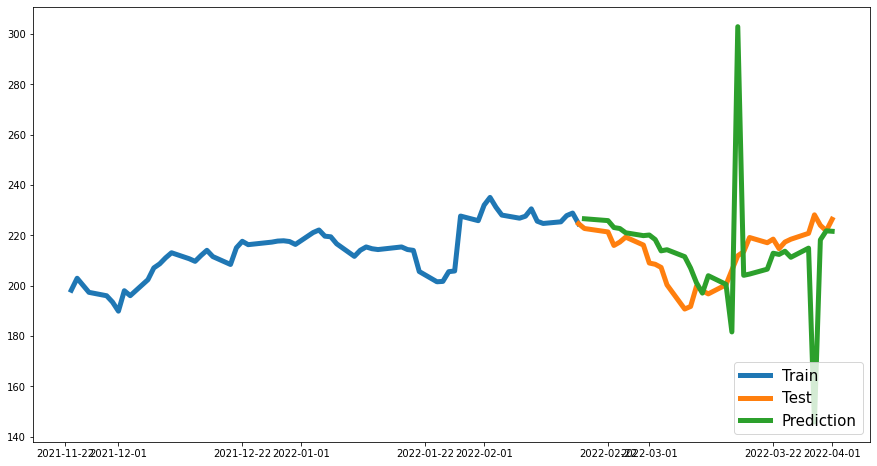

In [51]:
forecast3 = pd.DataFrame(forecast3, index = visadf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(visadf[-90:-30]["Adj Close"], label="Train")
plt.plot(visadf[-31:]["Adj Close"], label="Test")
plt.plot(forecast3, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

# 4. Machine Learning

In [52]:
visadf = yf.download("V", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [53]:
visadf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,78.760002,79.910004,78.489998,79.500000,76.844193,13785200
2017-01-04,79.440002,80.260002,79.360001,80.150002,77.472488,8033100
2017-01-05,80.339996,81.529999,80.220001,81.089996,78.381081,7805100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.94960,0.95550,0.9487,0.94994,0.94994,0
2017-01-03,0.95610,0.96640,0.9531,0.95602,0.95602,0
2017-01-04,0.95984,0.96234,0.9543,0.95970,0.95970,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2.511,2.518,2.448,2.450,2.450,0
2017-01-04,2.456,2.474,2.434,2.452,2.452,0
2017-01-05,2.439,2.443,2.346,2.368,2.368,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581009,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679935,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650730,3300


In [54]:
masterdf = pd.concat([visadf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["visa price", "amazon price", "euro price", "treasury price", "inflation price"]
# masterdf = np.log(masterdf).diff(1).dropna()
# masterdf.columns = [colname.replace("price", "return") for colname in masterdf.columns]

In [55]:
masterdf.head(3)

,visa price,amazon price,euro price,treasury price,inflation price
Date,,,,,
2019-11-07,175.675201,1788.199951,0.903310,1.926,23.581009
2019-11-08,176.206863,1785.880005,0.907466,1.933,23.679935
2019-11-11,176.768066,1771.650024,0.907240,1.943,23.650730


In [56]:
import copy

def ts2mldataset(ts, lag=5):
  dflist = []
  df = copy.deepcopy(masterdf)
  df.columns = [colname+"(t)" for colname in df.columns]
  dflist.append(df)

  for ii in range(1, lag+1):
    df = copy.deepcopy(masterdf)
    df.columns = [colname+f"(t-{ii})" for colname in df.columns]

    for jj in range(ii):
      df = df.shift(1)
    dflist.append(df)

  return pd.concat(dflist, axis=1)

In [57]:
mldf = ts2mldataset(masterdf, lag=10)

In [58]:
mldf.dropna(inplace=True)
mldf.shape
mldf.head(3)

(595, 55)

,visa price(t),amazon price(t),euro price(t),treasury price(t),inflation price(t),visa price(t-1),amazon price(t-1),euro price(t-1),treasury price(t-1),inflation price(t-1),...,visa price(t-9),amazon price(t-9),euro price(t-9),treasury price(t-9),inflation price(t-9),visa price(t-10),amazon price(t-10),euro price(t-10),treasury price(t-10),inflation price(t-10)
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-21,177.409317,1734.709961,0.90262,1.772,23.786396,179.154877,1745.530029,0.902527,1.738,23.829737,...,176.206863,1785.880005,0.907466,1.933,23.679935,175.675201,1788.199951,0.903310,1.926,23.581009
2019-11-22,176.995087,1745.719971,0.90368,1.774,23.874020,177.409317,1734.709961,0.902620,1.772,23.786396,...,176.768066,1771.650024,0.907240,1.943,23.650730,176.206863,1785.880005,0.907466,1.933,23.679935
2019-11-25,178.474411,1773.839966,0.90723,1.764,24.087885,176.995087,1745.719971,0.903680,1.774,23.874020,...,176.964966,1778.000000,0.906170,1.909,23.698782,176.768066,1771.650024,0.907240,1.943,23.650730


In [59]:
from pycaret.regression import *
import pandas as pd

In [ ]:
# compare_models()

In [61]:
maxlen = len(mldf)
forecast4 = []
from tqdm import tqdm

modelsetup = setup(data = mldf[:maxlen-30], target = 'visa price(t)', 
                  ignore_features = [],normalize = True,
                  transformation= True, transformation_method = 'yeo-johnson', 
                  transform_target = False, remove_outliers= True,
                  remove_multicollinearity = True,
                  ignore_low_variance = True, combine_rare_levels = True, silent=True)
cat_boost = create_model('catboost')
tuned_catboost = tune_model(cat_boost)

for ii in tqdm(range(30)):
  modelsetup = setup(data = mldf[ii:ii+maxlen-30], target = 'visa price(t)', 
                   ignore_features = [],normalize = True,
                   transformation= True, transformation_method = 'yeo-johnson', 
                   transform_target = False, remove_outliers= True,
                   remove_multicollinearity = True,
                   ignore_low_variance = True, combine_rare_levels = True, silent=True)
  tuned_catboost = finalize_model(tuned_catboost)
  forecast4.append(tuned_catboost.predict(mldf.iloc[-30+ii]))

,Description,Value
0,session_id,1891
1,Target,visa price(t)
2,Original Data,"(565, 55)"
3,Missing Values,False
4,Numeric Features,54
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(375, 5)"


100%|██████████| 30/30 [04:25<00:00,  8.84s/it]


In [62]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(visadf[-30:]["Adj Close"], forecast4, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=17.07


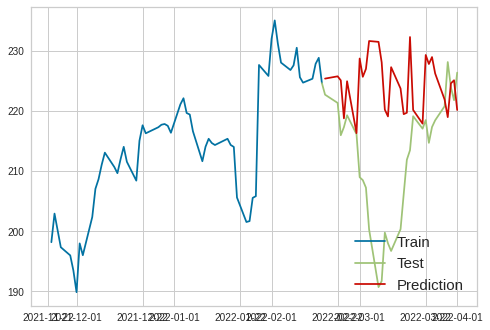

In [63]:
forecast4 = pd.DataFrame(forecast4, index = visadf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(visadf[-90:-30]["Adj Close"], label="Train")
plt.plot(visadf[-31:]["Adj Close"], label="Test")
plt.plot(forecast4, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()